# Imports & File Load

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
# import requests
# import json
import re
# import os
# import time
# from bs4 import BeautifulSoup
from collections import Counter
%matplotlib inline

In [2]:
df = pd.read_csv("sources/judges.csv")
df.head()

,nid,jid,Last Name,First Name,Middle Name,Suffix,Birth Month,Birth Day,Birth Year,Birth City,...,Degree (3),Degree Year (3),School (4),Degree (4),Degree Year (4),School (5),Degree (5),Degree Year (5),Professional Career,Other Nominations/Recess Appointments
0,1394646,3563,Abrams,Leslie,Joyce,,NaN,NaN,1974,Madison,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Marvin J. Garbis, U.S. Distric...",NaN
1,1393931,3419,Abrams,Ronnie,,,NaN,NaN,1968,New York,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Thomas P. Griesa, U.S. Distric...",NaN
2,1376976,1,Abruzzo,Matthew,T.,,4.0,30.0,1889,Brooklyn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Brooklyn, New York, 1910-1936",NaN
3,1376981,2,Acheson,Marcus,Wilson,,6.0,7.0,1828,Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Pittsburgh, Pennsylvania, 18...",NaN
4,1376986,3,Acker,William,Marsh,Jr.,10.0,25.0,1927,Birmingham,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"U.S. Army private first class, 1946-1947; Priv...",NaN


# Basic Clean
- make easy column headers
- remove the circa abbreviation everywhere 

In [3]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('/', '-')
df.columns = df.columns.str.replace('\(|\)|,', '')
df.replace('ca. ','',regex=True,inplace=True)

In [4]:
# df.apply(lambda row: row.astype(str).str.contains('ca. ').any())
# df.apply(lambda row: row.astype(str).str.contains('ca. ').any(), axis=1).value_counts()

# df = df.str.replace('ca.','circa')
# df = df.str.replace('ca.','')
# df.columns = df.columns.str.replace('ca. (\d\d\d\d)', '$1 circa', regex=True)
# df.replace('ca. (\d\d\d\d)', '$1 circa', regex=True)

# for col in df: 
#     df[col].str.contains('ca.')

# mask = np.column_stack([df[col].str.contains(r"ca. ", na=False) for col in df])
# df.loc[mask.any(axis=1)]

# circa.strip('ca. ') for circa in df.Degree_Year_1

# zed = df.apply(lambda row: row.astype(str).str.contains('ca. ').any(), axis=1)
# circa.strip('ca. ') for circa in zed

# df.df.School_1.apply(lambda x: x.strip('ca. '))
# df.Birth_Year = [x.strip('ca. ') for x in df.Birth_Year]

# File Investigation

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Columns: 201 entries, nid to Other_Nominations-Recess_Appointments
dtypes: float64(43), int64(2), object(156)
memory usage: 3.5+ MB


In [9]:
original_size = df.memory_usage().sum()
original_size

3634936

In [10]:
# df.dtypes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 201 columns):
nid                                      int64
jid                                      int64
Last_Name                                object
First_Name                               object
Middle_Name                              object
Suffix                                   object
Birth_Month                              float64
Birth_Day                                float64
Birth_Year                               object
Birth_City                               object
Birth_State                              object
Death_Month                              float64
Death_Day                                float64
Death_Year                               float64
Death_City                               object
Death_State                              object
Gender                                   object
Race_or_Ethnicity                        object
Court_Type_1             

In [ ]:
# df = df.drop(columns='url')

In [17]:
# df.profile_report()

# Basic Research

### Most Appointments

In [12]:
df.Appointing_President_1.value_counts().head()

William J. Clinton    357
Ronald Reagan         347
George W. Bush        310
Barack Obama          308
Jimmy Carter          247
Name: Appointing_President_1, dtype: int64

### Qualifications
- ABA Rating
- Committee Recommendations
- Termination Types

In [13]:
df.ABA_Rating_1.value_counts()

Well Qualified                    1248
Qualified                          948
Not Qualified                       17
Exceptionally Well Qualified        11
Not Qualified By Reason of Age       3
Name: ABA_Rating_1, dtype: int64

In [14]:
df[df.ABA_Rating_1.str.contains("Not", na=False)]['Appointing_President_1'].value_counts()

Lyndon B. Johnson     5
George W. Bush        4
Donald J. Trump       4
William J. Clinton    3
Jimmy Carter          3
John F. Kennedy       1
Name: Appointing_President_1, dtype: int64

In [15]:
df[df.ABA_Rating_1.str.contains("Not", na=False)]

,nid,jid,Last_Name,First_Name,Middle_Name,Suffix,Birth_Month,Birth_Day,Birth_Year,Birth_City,...,Degree_3,Degree_Year_3,School_4,Degree_4,Degree_Year_4,School_5,Degree_5,Degree_Year_5,Professional_Career,Other_Nominations-Recess_Appointments
220,1392166,3066,Benitez,Roger,T.,,NaN,NaN,1950,Havana,...,J.D.,1978,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Imperial County, California,...",NaN
444,1391431,2919,Bunning,David,L.,,NaN,NaN,1966,Ft. Thomas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Law clerk, U.S. Attorney's Office, Eastern Dis...",Nominated to U.S. District Court for the Easte...
605,1379101,429,Christie,Sidney,Lee,,4.0,17.0,1903,Sinks Grove,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, 1928-1960; Divorce commissio...",NaN
637,1379231,455,Clemon,U.,W.,,NaN,NaN,1943,Fairfield,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Birmingham, Alabama, 1969-19...",NaN
1242,5153441,5153441,Goodwin,Charles,Barnes,NaN,NaN,NaN,1970,Clinton,...,J.D.,1997,NaN,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Claire V. Egan, U.S. District ...",Nominated to U.S. District Court for the Weste...
1247,1381376,887,Gordon,Eugene,Andrew,,7.0,10.0,1917,Brown Summit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Alamance County, North Carol...",NaN
1269,4025236,4025236,Grasz,Leonard,Steven,NaN,NaN,NaN,1961,Chappell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Private practice, Omaha, Nebraska, 1989-1991, ...",NaN
1352,1381726,957,Hamilton,David,Frank,,NaN,NaN,1957,Bloomington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Law clerk, Hon. Richard Cudahy, U.S. Court of ...",NaN
1565,1382511,1116,Hughes,Sarah,Tilghman,,8.0,2.0,1896,Baltimore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Police officer, Washington, D.C., 1919-1922; P...",Nominated to U.S. District Court for the North...
1609,1392211,3075,Irizarry,Dora,L.,,NaN,NaN,1955,San Sebastian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Assistant district attorney, Bronx County, New...",NaN


In [16]:
df[df.ABA_Rating_1.str.contains("Not", na=False)][['Last_Name','ABA_Rating_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Last_Name,ABA_Rating_1,Appointing_President_1,Confirmation_Date_1
1829,Kobes,Not Qualified,Donald J. Trump,2018-12-11
1242,Goodwin,Not Qualified,Donald J. Trump,2018-08-28
3261,Teeter,Not Qualified,Donald J. Trump,2018-08-01
1269,Grasz,Not Qualified,Donald J. Trump,2017-12-12
3385,Van Tatenhove,Not Qualified,George W. Bush,2005-12-21
1609,Irizarry,Not Qualified,George W. Bush,2004-06-24
220,Benitez,Not Qualified,George W. Bush,2004-06-17
444,Bunning,Not Qualified,George W. Bush,2002-02-14
1352,Hamilton,Not Qualified,William J. Clinton,1994-10-07
1724,Katz,Not Qualified,William J. Clinton,1994-10-07


In [18]:
df[df.ABA_Rating_2.str.contains("Not", na=False)][['Last_Name','ABA_Rating_2','Appointing_President_2','Confirmation_Date_2']].sort_values(by='Confirmation_Date_2', ascending=False)

,Last_Name,ABA_Rating_2,Appointing_President_2,Confirmation_Date_2
2487,O'Brien,Not Qualified,Jimmy Carter,1978-10-04
605,Christie,Not Qualified By Reason of Age,Lyndon B. Johnson,1964-04-30


In [21]:
df[df.ABA_Rating_3.str.contains("Not", na=False)][['Last_Name','ABA_Rating_3','Appointing_President_3','Confirmation_Date_3']].sort_values(by='Confirmation_Date_3', ascending=False)

,Last_Name,ABA_Rating_3,Appointing_President_3,Confirmation_Date_3


In [22]:
df.Judiciary_Committee_Action_1.value_counts()

Reported (favorably)                     3378
Reported (no recommendation recorded)      99
No Committee before December 10, 1816      84
Not Referred to Committee                  84
Not Reported                               15
Reported (unfavorably)                      9
Reported (unknown)                          9
Reported (without recommendation)           4
Recommended Postponement                    1
Name: Judiciary_Committee_Action_1, dtype: int64

In [27]:
df[~df.Judiciary_Committee_Action_1.str.contains("\(favorably", na=False)][['Last_Name','Judiciary_Committee_Action_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False).dropna().head(60)

,Last_Name,Judiciary_Committee_Action_1,Appointing_President_1,Confirmation_Date_1
1512,Holmes,Reported (without recommendation),George W. Bush,2004-07-06
2055,Manion,Reported (without recommendation),Ronald Reagan,1986-06-26
2286,Miller,Not Referred to Committee,Richard M. Nixon,1973-06-28
1456,Hickey,Reported (no recommendation recorded),Lyndon B. Johnson,1966-06-09
2969,Seitz,Reported (no recommendation recorded),Lyndon B. Johnson,1966-06-09
3091,Smith,Reported (no recommendation recorded),Lyndon B. Johnson,1966-03-25
1430,Heebe,Reported (no recommendation recorded),Lyndon B. Johnson,1966-03-25
975,Edwards,Reported (no recommendation recorded),John F. Kennedy,1963-12-16
935,Dumbauld,Not Reported,John F. Kennedy,1961-08-02
3588,Wilson,Reported (no recommendation recorded),John F. Kennedy,1961-06-14


In [29]:
df.Termination_1.value_counts()

Death                                       1417
Appointment to Another Judicial Position     353
Retirement                                   271
Resignation                                  235
Reassignment                                 116
Abolition of Court                            29
Recess Appointment-Not Confirmed              23
Impeachment & Conviction                       7
Name: Termination_1, dtype: int64

In [30]:
df[df.Termination_1.str.contains("Impeachment", na=False)][['First_Name','Last_Name','Termination_1','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,First_Name,Last_Name,Termination_1,Appointing_President_1,Confirmation_Date_1
2656,G.,Porteous,Impeachment & Conviction,William J. Clinton,1994-10-07
1400,Alcee,Hastings,Impeachment & Conviction,Jimmy Carter,1979-10-31
612,Harry,Claiborne,Impeachment & Conviction,Jimmy Carter,1978-08-11
2462,Walter,Nixon,Impeachment & Conviction,Lyndon B. Johnson,1968-06-06
2790,Halsted,Ritter,Impeachment & Conviction,Calvin Coolidge,1929-02-15
1574,West,Humphreys,Impeachment & Conviction,Franklin Pierce,1853-03-26
2619,John,Pickering,Impeachment & Conviction,George Washington,1795-02-11


In [31]:
df[df.Termination_1.str.contains("Recess", na=False)][['Last_Name','Termination_1','Appointing_President_1','Recess_Appointment_Date_1']].sort_values(by='Recess_Appointment_Date_1', ascending=False)

,Last_Name,Termination_1,Appointing_President_1,Recess_Appointment_Date_1
1431,Heen,Recess Appointment-Not Confirmed,Jimmy Carter,1981-01-01
2703,Rabinovitz,Recess Appointment-Not Confirmed,Lyndon B. Johnson,1964-01-07
1040,Feikens,Recess Appointment-Not Confirmed,Dwight D. Eisenhower,1960-10-13
1443,Henley,Recess Appointment-Not Confirmed,Dwight D. Eisenhower,1958-10-25
1125,Friedman,Recess Appointment-Not Confirmed,Harry S Truman,1952-07-17
71,Andrews,Recess Appointment-Not Confirmed,Harry S Truman,1949-10-21
3229,Switzer,Recess Appointment-Not Confirmed,Harry S Truman,1949-10-21
1380,Harper,Recess Appointment-Not Confirmed,Harry S Truman,1947-08-07
2798,Roberts,Recess Appointment-Not Confirmed,Franklin D. Roosevelt,1938-07-06
1650,Johnson,Recess Appointment-Not Confirmed,Herbert Hoover,1932-08-03


### Gender & Race Breakdowns

In [34]:
df.groupby(by='Party_of_Appointing_President_1').Gender.value_counts(1)

Party_of_Appointing_President_1  Gender
Democratic                       Male      0.836675
                                 Female    0.163325
Federalist                       Male      1.000000
Jeffersonian Republican          Male      1.000000
None (reassignment)              Male      1.000000
Republican                       Male      0.914286
                                 Female    0.085714
Whig                             Male      1.000000
Name: Gender, dtype: float64

In [35]:
df.groupby(by='Party_of_Appointing_President_1').Race_or_Ethnicity.value_counts(1)

Party_of_Appointing_President_1  Race_or_Ethnicity              
Democratic                       White                              0.843750
                                 AfriAmerican                       0.095519
                                 Hispanic                           0.040094
                                 Asian American                     0.013561
                                 AmeriIndian                        0.001769
                                 AfriAmerican/Hispanic              0.001179
                                 Asian American/Pacific Islander    0.001179
                                 Hispanic/White                     0.001179
                                 AfriAmerican/White                 0.000590
                                 Asian American/Hispanic            0.000590
                                 Asian American/White               0.000590
Federalist                       White                              1.000000
Jeffersonia

### Declined Appointments

In [33]:
df[df['Other_Nominations-Recess_Appointments'].str.contains("declined", na=False)][['Last_Name','Other_Nominations-Recess_Appointments','Appointing_President_1','Confirmation_Date_1']].sort_values(by='Confirmation_Date_1', ascending=False)

,Last_Name,Other_Nominations-Recess_Appointments,Appointing_President_1,Confirmation_Date_1
307,Boreman,Received recess appointment to U.S. Court of A...,Dwight D. Eisenhower,1954-07-21
1652,Johnson,"Nominated to U.S. Customs Court, March 29, 194...",Harry S Truman,1947-06-23
41,Allred,Received recess appointment to U.S. District C...,Franklin D. Roosevelt,1939-02-16
1160,Garrett,Received recess appointment to U.S. District C...,Calvin Coolidge,1929-02-18
2138,McCarthy,Nominated to U.S. District Court for the Distr...,Calvin Coolidge,1929-01-08
2467,Norcross,Received recess appointment to U.S. Court of A...,Calvin Coolidge,1928-04-17
829,Day,Received recess appointment to U.S. District C...,William McKinley,1899-02-28
864,Dick,Received recess appointment to U.S. District C...,Ulysses Grant,1872-06-07
3609,Withey,Nominated to U.S. District Court for the Weste...,Abraham Lincoln,1863-03-11
1980,Livingston,Received recess appointment to U.S. District C...,Thomas Jefferson,1806-12-17


In [38]:
# df.apply(lambda 7: x.str.contains(r"declined").any()).idxmax()

### Professional Background

In [36]:
df.Professional_Career

0       Law clerk, Hon. Marvin J. Garbis, U.S. Distric...
1       Law clerk, Hon. Thomas P. Griesa, U.S. Distric...
2         Private practice, Brooklyn, New York, 1910-1936
3       Private practice, Pittsburgh, Pennsylvania, 18...
4       U.S. Army private first class, 1946-1947; Priv...
5       Private practice, New Jersey, 1951-1954; Judge...
6       Private practice, Sangamon County, Illinois, 1...
7       Private practice, Hackensack, New Jersey, 1953...
8       Private practice, Muskogee, Oklahoma, 1912-191...
9       Private practice, Philadelphia, Pennsylvania, ...
10      Teacher, AmeriUnion Commission, Georgia, 1865-...
11      Private practice, Frankfort, Kentucky, 1810-18...
12      U.S. Army, 1861-1871; Merchant, 1871-1878; Pri...
13      Reginald Heber Smith fellow, Duval County Lega...
14      Law clerk, Hon. W. F. Spicer, Summit County [O...
15      Private practice, Carrollton, Georgia, 1876-19...
16      Research assistant, Columbia University Law Sc...
17      Assist

In [37]:
df.Professional_Career = df.Professional_Career.astype(str)
Counter(" ".join(df.Professional_Career).lower().split()).most_common(100)
# pd.Series(' '.join(df.Professional_Career).lower().split()).value_counts().head(100)

[('of', 6835),
 ('private', 4501),
 ('practice,', 4463),
 ('u.s.', 4128),
 ('district', 2333),
 ('the', 1967),
 ('attorney,', 1937),
 ('assistant', 1840),
 ('new', 1830),
 ('judge,', 1538),
 ('court', 1476),
 ('state', 1341),
 ('court,', 1319),
 ('law', 1275),
 ('judicial', 1165),
 ('attorney', 997),
 ('county,', 964),
 ('clerk,', 939),
 ('and', 846),
 ('for', 835),
 ('hon.', 811),
 ('member,', 778),
 ('county', 772),
 ('california,', 750),
 ('justice,', 694),
 ('united', 671),
 ('law,', 651),
 ('counsel,', 633),
 ('states,', 615),
 ('york,', 590),
 ('circuit,', 590),
 ('general,', 588),
 ('army', 587),
 ('university', 580),
 ('pennsylvania,', 560),
 ('department', 520),
 ('york', 516),
 ('supreme', 510),
 ('city,', 497),
 ('deputy', 491),
 ('texas,', 491),
 ('washington,', 482),
 ('conference', 477),
 ('city', 472),
 ('special', 463),
 ('illinois,', 430),
 ('general', 397),
 ('circuit', 395),
 ('professor,', 384),
 ('virginia,', 381),
 ('ohio,', 361),
 ('carolina,', 358),
 ('jersey,',

### Education

In [41]:
df.Degree_1.value_counts()

B.A.                                     1323
A.B.                                      715
LL.B.                                     416
B.S.                                      387
B.B.A.                                     53
A.A.                                       44
J.D.                                       36
Ph.B.                                      31
B.S.B.A.                                   10
B.S.L.                                      7
B.L.                                        6
B.S.E.                                      6
B.A., B.S.                                  6
A.M.                                        5
M.A.                                        5
B.S.F.S.                                    4
B.Sc.                                       3
B.S.E.E.                                    2
B.Litt.                                     2
M.D.                                        2
B.E.E.                                      2
Litt.B.                           

In [43]:
df.Degree_2.value_counts()

J.D.                            1462
LL.B.                            843
M.A.                              93
B.A.                              59
A.B.                              57
A.M.                              40
B.S.                              33
LL.M.                             29
M.S.                              12
M.B.A.                            10
M.P.A.                             4
B.B.A.                             4
M.Sc.                              3
M.Phil.                            3
M.Ed.                              3
M.A.T.                             3
Litt.B.                            2
D.Phil.                            2
M.L.S.                             2
J.D., LL.B.                        2
B.L.                               2
M.S.W.                             2
Diploma in Legal Studies           2
Ph.B.                              2
B.C.L.                             1
A.B., LL.B.                        1
M.St.                              1
L

In [44]:
df.Degree_3.value_counts()

J.D.                                      179
LL.M.                                      98
LL.B.                                      84
M.A.                                       25
A.M.                                       10
Ph.D.                                       8
M.B.A.                                      6
B.A.                                        6
M.S.                                        5
A.B.                                        5
S.J.D.                                      4
M.J.S.                                      3
B.S.                                        3
M.P.A.                                      3
LL.M., judicial process                     2
J.S.D.                                      2
M.S.W.                                      2
Certificate in Dispute Resolution           1
Civil Mediator Certificate                  1
B.Pd.                                       1
M.Phil.                                     1
B.A., M.A.                        

In [45]:
df.Degree_4.value_counts()

J.D.                                    14
LL.M.                                   10
LL.B.                                   10
Ph.D.                                    4
A.M.                                     4
S.J.D.                                   3
M.A.                                     3
M.P.A.                                   2
M.Div.                                   1
M.P.P.M.                                 1
Diploma in International Arbitration     1
B.Litt.                                  1
LL.M., judicial studies                  1
B.A.                                     1
B.C.S.                                   1
Name: Degree_4, dtype: int64

In [46]:
df.School_1 = df.School_1.astype(str)
Counter(" ".join(df.School_1).lower().split()).most_common(100)

[('university', 2370),
 ('of', 1673),
 ('college', 971),
 ('law', 814),
 ('school', 494),
 ('(now', 254),
 ('read', 240),
 ('state', 211),
 ('harvard', 150),
 ('yale', 128),
 ('new', 116),
 ('university)', 111),
 ('michigan', 108),
 ('texas', 100),
 ('washington', 95),
 ('princeton', 87),
 ('st.', 85),
 ('georgetown', 84),
 ('virginia', 82),
 ('california,', 76),
 ('pennsylvania', 68),
 ('and', 66),
 ('columbia', 60),
 ('york', 59),
 ('florida', 54),
 ('college,', 54),
 ('carolina', 51),
 ('illinois', 51),
 ('city', 49),
 ('university,', 47),
 ('louisiana', 44),
 ('notre', 44),
 ('south', 42),
 ('ohio', 41),
 ('southern', 41),
 ('dame', 41),
 ('north', 40),
 ('stanford', 40),
 ('indiana', 40),
 ('cornell', 39),
 ('dartmouth', 39),
 ('berkeley', 38),
 ('alabama', 38),
 ('chicago', 36),
 ('kansas', 36),
 ('western', 35),
 ('oklahoma', 35),
 ('missouri', 35),
 ('law)', 35),
 ('california', 34),
 ('the', 34),
 ('institute', 33),
 ('los', 33),
 ('iowa', 33),
 ('angeles', 31),
 ('georgia', 3

In [ ]:
df.School_1 = df.School_1.astype(str)
df.School_2 = df.School_2.astype(str)
df.School_3 = df.School_3.astype(str)
# pd.Series(' '.join(df.School_1 & df.School_2 & df.School_3).lower().split()).value_counts().head(100)

In [47]:
df.groupby(by='Party_of_Appointing_President_1').School_2.value_counts(1)

Party_of_Appointing_President_1  School_2                                                                      
Democratic                       Harvard Law School                                                                0.102100
                                 Read law                                                                          0.054308
                                 Yale Law School                                                                   0.047791
                                 Columbia Law School                                                               0.028240
                                 University of Texas School of Law                                                 0.025344
                                 University of Virginia School of Law                                              0.018103
                                 Stanford Law School                                                               0.017379
                    

In [48]:
df[df['School_1'] == 'Read law'].Degree_Year_1.max()

'1934'

In [49]:
df[df['School_2'] == 'Read law'].Degree_Year_2.max()

'1938'

In [50]:
df[df['School_3'] == 'Read law'].Degree_Year_3.max()

'1930'

In [51]:
allschol_df = df.melt(value_vars =['School_1','School_2','School_3'])
allschol_df.value.value_counts().head(60)
# allschol_df.value.sort_values(ascending=True).head(60)

Read law                                                                531
Harvard Law School                                                      329
Yale Law School                                                         147
University of Virginia School of Law                                    132
University of Michigan Law School                                       113
University of Texas School of Law                                       101
Columbia Law School                                                      99
Harvard University                                                       86
Harvard College                                                          79
Yale University                                                          75
University of Michigan                                                   73
Princeton University                                                     69
New York University School of Law                                        67
University o

In [ ]:
# cleaner = {
#     'University of':'Uof',
#     'University':'',
#     'College of':'Cof',
#     'College':'',
#     'School':'',
#     'Center':'',
#     'of Law':'',
#     'Law':''
# }
# allschol_df['cleaned'] = allschol_df['value'].map(cleaner)
# allschol_df.update(allschol_df.cleaned)
# allschol_df.cleaned.value_counts().head(90)

In [52]:
allschol_df['cleaned'] = allschol_df['value']
allschol_df.cleaned.replace(r'.*\(now (.*)\)',r'\1',regex=True,inplace=True)
allschol_df.replace({'cleaned':{
    'College of':'Cof',
    ' Cof':'',
    ' College':'',
    'University of':'Uof',
    'University':'',
    ' School':'',
    ' Center':'',
    ' of Law':'',
    ' Law':'',
    ', Boalt Hall':'',
    ' -- Newark':'',
    ' -- Camden':'',
    'Yale ':'Yale'
}},regex=True,inplace=True)
allschol_df.cleaned.replace(r',$','',regex=True,inplace=True)
allschol_df.cleaned.str.strip()
allschol_df.cleaned.value_counts().head(60)
# allschol_df.cleaned.sort_values(ascending=True).head(60)

# Still have 2 Yales / Harvards / Columbias / Stanfords / Notre Dame
# Still have Cof
# Lots of outliers

Read law                       531
Harvard                        408
Yale                           284
Uof Michigan                   186
Uof Virginia                   167
Uof Texas                      152
Georgetown                     139
Columbia                       119
Uof Pennsylvania               115
Princeton                      103
Harvard                         86
New York                        79
Uof California, Berkeley        75
George Washington               75
Uof Chicago                     74
Uof Alabama                     64
Northwestern                    61
Uof Georgia                     55
Stanford                        55
Louisiana State                 54
Uof North Carolina              52
Vanderbilt                      52
Duke                            50
Uof California, Los Angeles     49
Uof South Carolina              49
Tulane                          49
Uof Florida Cof                 48
Columbia                        48
Uof Arkansas        

In [ ]:
# allschol_df[allschol_df.cleaned.str.contains("Prince", na=False)]

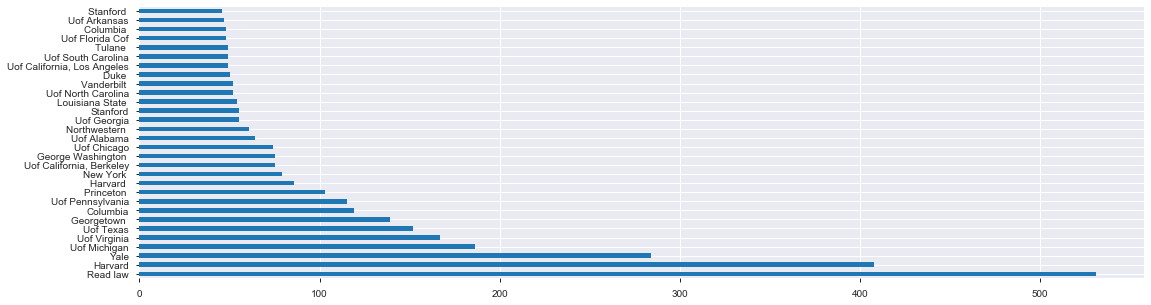

In [53]:
allschol_df.cleaned.value_counts().head(30).plot(kind='barh', figsize=(18, 5))

In [55]:
df[df['School_1'].isin(['Harvard University', 'Yale University', 'Brown University', 'Columbia University', 'Princeton University'])]

,nid,jid,Last_Name,First_Name,Middle_Name,Suffix,Birth_Month,Birth_Day,Birth_Year,Birth_City,...,Degree_3,Degree_Year_3,School_4,Degree_4,Degree_Year_4,School_5,Degree_5,Degree_Year_5,Professional_Career,Other_Nominations-Recess_Appointments


In [56]:
df['Birth_Month'] = pd.to_numeric(df['Birth_Month'], errors='coerce').fillna(0).astype(int)
df['Birth_Day'] = pd.to_numeric(df['Birth_Day'], errors='coerce').fillna(0).astype(int)
df['Birth_Year'] = pd.to_numeric(df['Birth_Year'], errors='coerce').fillna(0).astype(int)
df['Birth_Date'] = df.Birth_Year.map(str).astype(str).str.zfill(4) + '-' + df.Birth_Month.map(str).astype(str).str.zfill(2) + '-' + df.Birth_Day.map(str).astype(str).str.zfill(2)
df['Death_Month'] = pd.to_numeric(df['Death_Month'], errors='coerce').fillna(0).astype(int)
df['Death_Day'] = pd.to_numeric(df['Death_Day'], errors='coerce').fillna(0).astype(int)
df['Death_Year'] = pd.to_numeric(df['Death_Year'], errors='coerce').fillna(0).astype(int)
df['Death_Date'] = df.Death_Year.map(str).astype(str).str.zfill(4) + '-' + df.Death_Month.map(str).astype(str).str.zfill(2) + '-' + df.Death_Day.map(str).astype(str).str.zfill(2)
df.Birth_Date.head(10)
# df.dtypes.head(15)

0       1974-00-00
1       1968-00-00
2       1889-04-30
3       1828-06-07
4       1927-10-25
5       1928-02-15
6       1926-01-01
7       1925-05-31
8       1887-02-23
9       1921-04-16
10      1842-10-27
11      1784-08-01
12      1845-04-03
13      1945-00-00
14      1955-00-00
15      1854-08-13
16      1939-00-00
17      1879-04-13
18      1867-08-30
19      1951-00-00
20      1952-00-00
21      1931-00-00
22      1951-00-00
23      1910-05-10
24      1869-10-09
25      1920-03-29
26      1925-08-14
27      1959-00-00
28      1936-00-00
29      1919-11-10
           ...    
3664    1981-00-00
3665    1906-05-27
3666    1968-00-00
3667    1961-00-00
3668    1888-09-25
3669    1945-00-00
3670    1935-00-00
3671    1860-05-23
3672    1910-07-13
3673    1916-08-04
3674    1870-12-11
3675    1907-04-26
3676    1848-12-03
3677    1922-07-18
3678    1953-00-00
3679    1940-00-00
3680    1896-05-29
3681    1941-00-00
3682    1951-00-00
3683    1928-03-18
3684    1944-00-00
3685    1939

In [64]:
df = df.astype({
    'Birth_Date':                           'datetime64',
    'Death_Date':                           'datetime64',
    'Recess_Appointment_Date_1':            'datetime64',
    'Nomination_Date_1':                    'datetime64',
    'Committee_Referral_Date_1':            'datetime64',
    'Hearing_Date_1':                       'datetime64',
    'Committee_Action_Date_1':              'datetime64',
    'Confirmation_Date_1':                  'datetime64',
    'Commission_Date_1':                    'datetime64',
    'Service_as_Chief_Judge_Begin_1':       'datetime64',
    'Service_as_Chief_Judge_End_1':         'datetime64',
    '2nd_Service_as_Chief_Judge_Begin_1':   'datetime64',
    '2nd_Service_as_Chief_Judge_End_1':     'datetime64',
    'Senior_Status_Date_1':                 'datetime64',
    'Termination_Date_1':                   'datetime64',
    'Recess_Appointment_Date_2':            'datetime64',
    'Nomination_Date_2':                    'datetime64',
    'Committee_Referral_Date_2':            'datetime64',
    'Hearing_Date_2':                       'datetime64',
    'Committee_Action_Date_2':              'datetime64',
    'Confirmation_Date_2':                  'datetime64',
    'Commission_Date_2':                    'datetime64',
    'Service_as_Chief_Judge_Begin_2':       'datetime64',
    'Service_as_Chief_Judge_End_2':         'datetime64',
    '2nd_Service_as_Chief_Judge_Begin_2':   'datetime64',
    '2nd_Service_as_Chief_Judge_End_2':     'datetime64',
    'Senior_Status_Date_2':                 'datetime64',
    'Termination_Date_2':                   'datetime64',
    'Recess_Appointment_Date_3':            'datetime64',
    'Nomination_Date_3':                    'datetime64',
    'Committee_Referral_Date_3':            'datetime64',
    'Hearing_Date_3':                       'datetime64',
    'Committee_Action_Date_3':              'datetime64',
    'Confirmation_Date_3':                  'datetime64',
    'Commission_Date_3':                    'datetime64',
    'Service_as_Chief_Judge_Begin_3':       'datetime64',
    'Service_as_Chief_Judge_End_3':         'datetime64',
    '2nd_Service_as_Chief_Judge_Begin_3':   'datetime64',
    '2nd_Service_as_Chief_Judge_End_3':     'datetime64',
    'Senior_Status_Date_3':                 'datetime64',
    'Termination_Date_3':                   'datetime64',
    'Recess_Appointment_Date_4':            'datetime64',
    'Nomination_Date_4':                    'datetime64',
    'Committee_Referral_Date_4':            'datetime64',
    'Hearing_Date_4':                       'datetime64',
    'Committee_Action_Date_4':              'datetime64',
    'Confirmation_Date_4':                  'datetime64',
    'Commission_Date_4':                    'datetime64',
    'Service_as_Chief_Judge_Begin_4':       'datetime64',
    'Service_as_Chief_Judge_End_4':         'datetime64',
    '2nd_Service_as_Chief_Judge_Begin_4':   'datetime64',
    '2nd_Service_as_Chief_Judge_End_4':     'datetime64',
    'Senior_Status_Date_4':                 'datetime64',
    'Termination_Date_4':                   'datetime64',
    'Recess_Appointment_Date_5':            'datetime64',
    'Nomination_Date_5':                    'datetime64',
    'Committee_Referral_Date_5':            'datetime64',
    'Hearing_Date_5':                       'datetime64',
    'Committee_Action_Date_5':              'datetime64',
    'Confirmation_Date_5':                  'datetime64',
    'Commission_Date_5':                    'datetime64',
    'Service_as_Chief_Judge_Begin_5':       'datetime64',
    'Service_as_Chief_Judge_End_5':         'datetime64',
    '2nd_Service_as_Chief_Judge_Begin_5':   'datetime64',
    '2nd_Service_as_Chief_Judge_End_5':     'datetime64',
    'Senior_Status_Date_5':                 'datetime64',
    'Termination_Date_5':                   'datetime64',
    'Recess_Appointment_Date_6':            'datetime64',
    'Nomination_Date_6':                    'datetime64',
    'Committee_Referral_Date_6':            'datetime64',
    'Hearing_Date_6':                       'datetime64',
    'Committee_Action_Date_6':              'datetime64',
    'Confirmation_Date_6':                  'datetime64',
    'Commission_Date_6':                    'datetime64',
    'Service_as_Chief_Judge_Begin_6':       'datetime64',
    'Service_as_Chief_Judge_End_6':         'datetime64',
    '2nd_Service_as_Chief_Judge_Begin_6':   'datetime64',
    '2nd_Service_as_Chief_Judge_End_6':     'datetime64',
    'Senior_Status_Date_6':                 'datetime64',
    'Termination_Date_6':                   'datetime64',
#     'Degree_Year_1':                        'datetime64',
#     'Degree_Year_2':                        'datetime64',
#     'Degree_Year_3':                        'datetime64',
#     'Degree_Year_4':                        'datetime64',
#     'Degree_Year_5':                        'datetime64'
})

df['Degree_Year_1'] = pd.to_datetime(df['Degree_Year_1'],format='%Y', errors='coerce')
df['Degree_Year_2'] = pd.to_datetime(df['Degree_Year_2'],format='%Y', errors='coerce')
df['Degree_Year_3'] = pd.to_datetime(df['Degree_Year_3'],format='%Y', errors='coerce')
df['Degree_Year_4'] = pd.to_datetime(df['Degree_Year_4'],format='%Y', errors='coerce')
df['Degree_Year_5'] = pd.to_datetime(df['Degree_Year_5'],format='%Y', errors='coerce')

ValueError: The 'datetime64' dtype has no unit. Please pass in 'datetime64[ns]' instead.

In [58]:
df.Nomination_Date_2.sort_values(ascending=False).head(10)

240     2019-01-23
1732    2018-07-10
3211    2018-05-07
2700    2018-05-07
3136    2018-02-15
998     2018-01-08
302     2017-06-12
1005    2017-06-07
3272    2017-03-21
1254    2017-02-01
Name: Nomination_Date_2, dtype: object

In [ ]:
df.Nomination_Date_1 - df.Confirmation_Date_1

In [ ]:
timedelta

In [ ]:
# df[df['date'] >='20140905'].head()

In [ ]:
# df[(df['sku'].str.contains('B1-531')) & (df['quantity']>40)].sort(columns=['quantity','name'],ascending=[0,1])